In [1]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
import tensorflow.keras.preprocessing.image as prep #데이터 Augmentation, 하면 좋은거임

Using TensorFlow backend.


In [2]:
def VGG16_Brief(classes=2): # classes = 감지할 클래스 수
    img_rows, img_cols = 224, 224
    img_channels = 3    
    img_dim = (img_rows, img_cols, img_channels) #차원..shape 정의..
    
    img_input = Input(shape=img_dim) #튜플.. 변경 x
    x = Conv2D(64,(3,3),padding='same',activation = 'relu')(img_input) #1층
    x = Conv2D(64,(3,3),padding='same',activation = 'relu')(x) #2층
    x = MaxPooling2D((2,2),strides=(2,2))(x) #2층 maxpool

    x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) #3층
    #x = Conv2D(128,(3,3),padding='same',activation = 'relu')(x) #4층
    x = MaxPooling2D((2,2),strides=(2,2))(x) #4층 maxpool

    x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #5층
    #x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #6층
    x = Conv2D(256,(3,3),padding='same',activation = 'relu')(x) #7층
    x = MaxPooling2D((2,2),strides=(2,2))(x) #7층 maxpool

    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #8층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #9층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #10층
    #x = MaxPooling2D((2,2),strides=(2,2))(x) #10층 maxpool

    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #11층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #12층
    #x = Conv2D(512,(3,3),padding='same',activation = 'relu')(x) #13층
    #x = MaxPooling2D((2,2),strides=(2,2))(x) #13층 maxpool

    x = Flatten()(x)
    x = Dense(256, activation = 'relu')(x) #14층
    x = Dense(256, activation = 'relu')(x) #15층
    x = Dense(classes, activation = 'softmax')(x)
    
    model = Model(inputs=img_input, output = x)
    return model

In [3]:
model = VGG16_Brief(classes = 2)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2951

C:\Users\notou\Anaconda3\envs\tf_gpu_10\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [4]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
#데이터 증강.. dataset이 적을 떄 overfitting 방지
cat_dog_data_dir='C:\dataset\data_100'

train_datagen = prep.ImageDataGenerator(
rescale=1./255, #normalization 이미지 픽셀 값이 1/225를 곱해준다. default = 1
shear_range=0.2,#반시계 방향 밀리기
zoom_range=0.2, #줌
horizontal_flip=True #인풋을 무작위로 가로로 뒤집기
)

train_generator = train_datagen.flow_from_directory( #폴더 형태로된 데이터 구조 바로 가저옴
                                                    #이 데이터 불러올 떄 앞에 정의한 파라미터로 전처리
cat_dog_data_dir,
target_size=(224,224), #폴더 내 이미지 사이즈 조정
batch_size=32,  #32장씩 읽어들임
#shuffle=True,
class_mode='categorical' #2D one-hot 인코딩된 라벨 반환
)

Found 2000 images belonging to 2 classes.


In [88]:
#learnung rate 조정 필요할 시 조정해주는 code
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=5, #5번동안 accuracy 안늘면 
                                            verbose=1, #업데이트 되면 말해주는 것
                                            factor=0.1, 
                                            min_lr=0.00001)

In [89]:
history = model.fit(train_generator, epochs = 10, callbacks=[learning_rate_reduction])
#generator을 input으로 사용할 떄는 batch_size 이용하지 않음 
#batch_size 32 = 32장씩 읽어드리고 가중치 갱신 
#batch_size 값이 크면 클수록 여러 데이터를 기억하고 있어야 하기에 메모리가 커야 합니다. 그대신 학습 시간이 빨라집니다. 
#batch_size 값이 작으면 학습은 꼼꼼하게 이루어질 수 있지만 학습 시간이 많이 걸립니다.

Epoch 1/10
63/63 [==============================] - 28s 439ms/step - loss: 0.2692 - accuracy: 0.8830
Epoch 2/10
63/63 [==============================] - 27s 431ms/step - loss: 0.2634 - accuracy: 0.8900
Epoch 3/10
63/63 [==============================] - 28s 437ms/step - loss: 0.2373 - accuracy: 0.9075
Epoch 4/10
63/63 [==============================] - 26s 419ms/step - loss: 0.2226 - accuracy: 0.9085
Epoch 5/10
63/63 [==============================] - 25s 393ms/step - loss: 0.2312 - accuracy: 0.9085
Epoch 6/10
63/63 [==============================] - 25s 396ms/step - loss: 0.1744 - accuracy: 0.9295
Epoch 7/10
63/63 [==============================] - 24s 388ms/step - loss: 0.2031 - accuracy: 0.9160
Epoch 8/10
63/63 [==============================] - 24s 386ms/step - loss: 0.1507 - accuracy: 0.9455
Epoch 9/10
63/63 [==============================] - 25s 390ms/step - loss: 0.1338 - accuracy: 0.9490
Epoch 10/10
63/63 [==============================] - 25s 395ms/step - loss: 0.1392 - accura

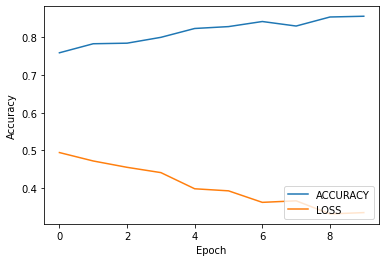

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label= 'ACCURACY')
plt.plot(history.history['loss'], label= 'LOSS')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc='lower right')
plt.show()

In [86]:
from keras.preprocessing import image
img = image.load_img("dogg1.png",target_size=(224,224))
img = np.asarray(img) #array로 변환

print(img)
plt.imshow(img) #이미지 보여줌
img = np.expand_dims(img, axis=0)  #shape 한 차원 확장 

output = model.predict(img)

print(output[0][1])
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')
    

[[[ 46  19   2]
  [ 46  19   2]
  [ 45  18   3]
  ...
  [ 60  29   0]
  [ 65  34   0]
  [ 71  40   2]]

 [[ 41  16   0]
  [ 41  16   0]
  [ 41  16   1]
  ...
  [ 62  30   0]
  [ 67  35   1]
  [ 72  40   4]]

 [[ 41  16   0]
  [ 41  16   0]
  [ 41  16   1]
  ...
  [ 62  30   0]
  [ 67  35   1]
  [ 72  40   4]]

 ...

 [[113 116 123]
  [111 113 121]
  [110 110 118]
  ...
  [ 83  80  89]
  [ 84  81  89]
  [ 86  83  91]]

 [[113 116 123]
  [111 113 121]
  [110 110 118]
  ...
  [ 83  80  89]
  [ 84  81  89]
  [ 86  83  91]]

 [[111 114 121]
  [111 113 120]
  [112 112 120]
  ...
  [ 85  82  90]
  [ 85  82  90]
  [ 85  82  90]]]
1.0
dog
